Task 1: Customer Behavior Analysis Program

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), o

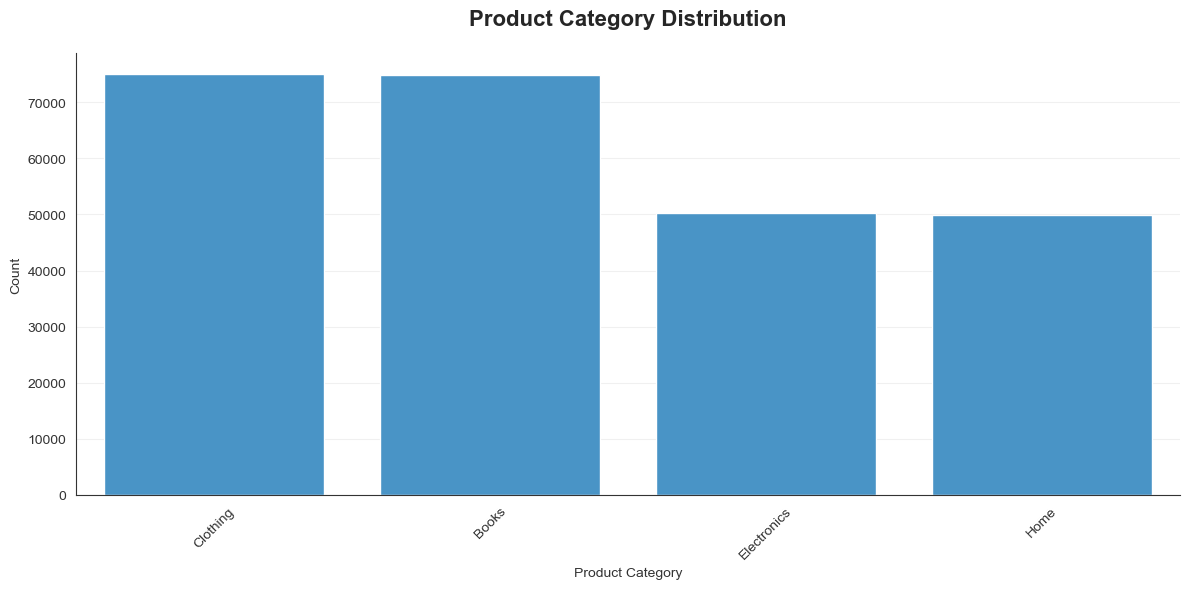

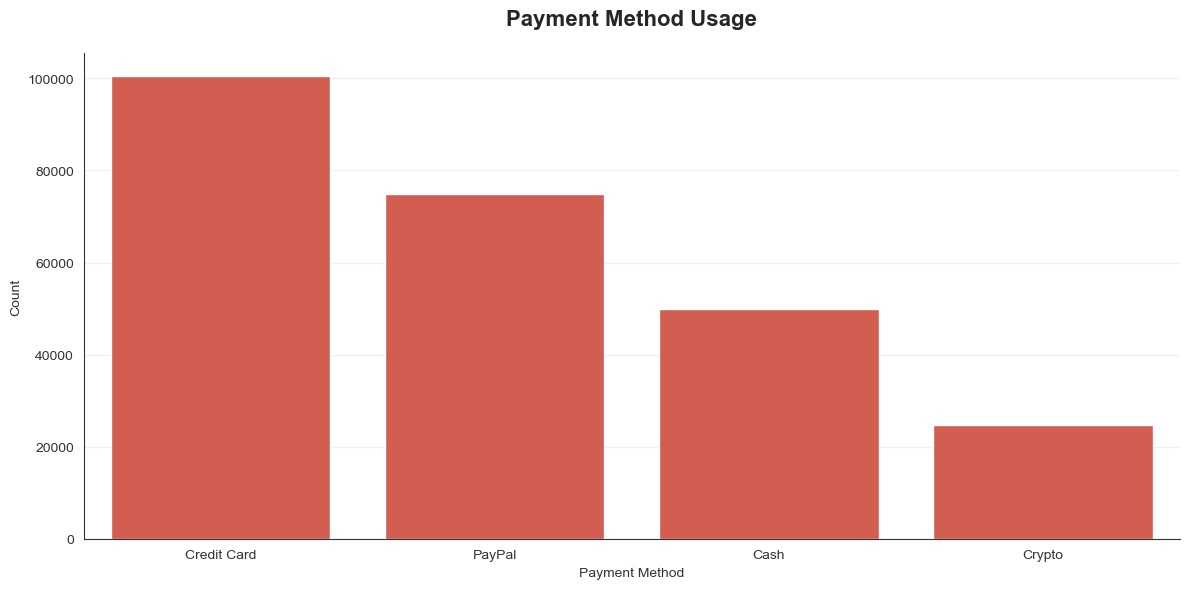

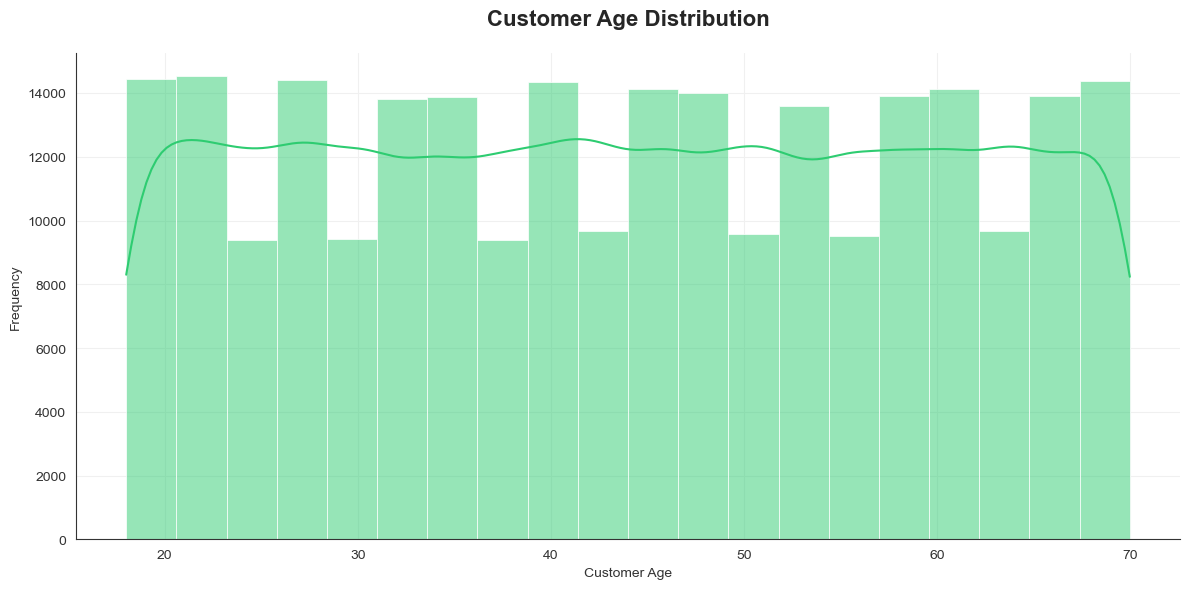

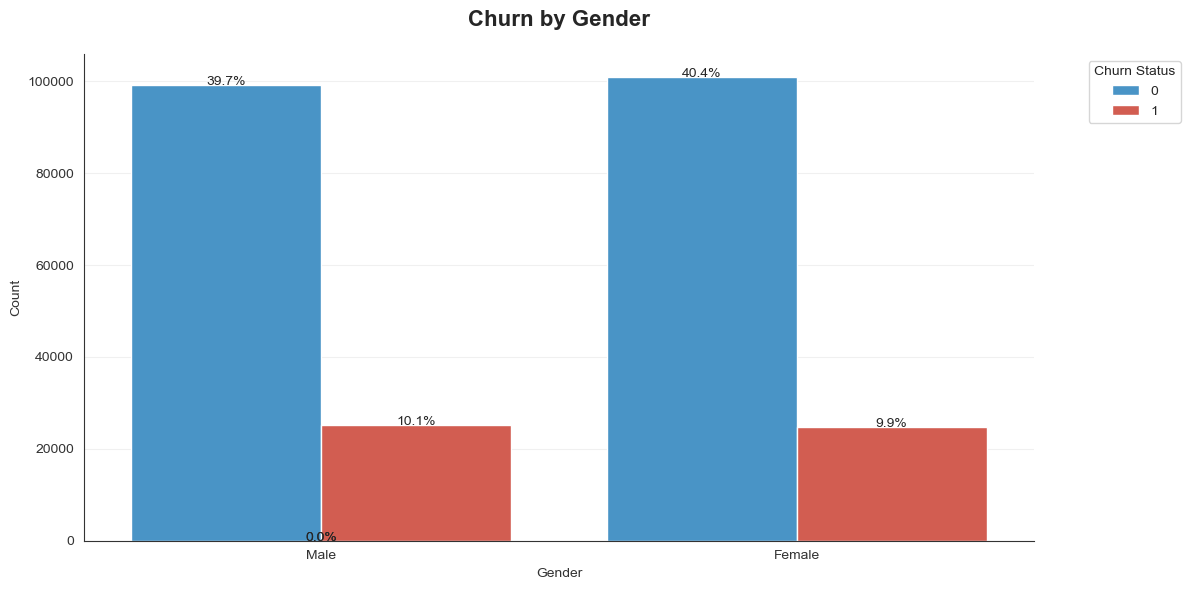

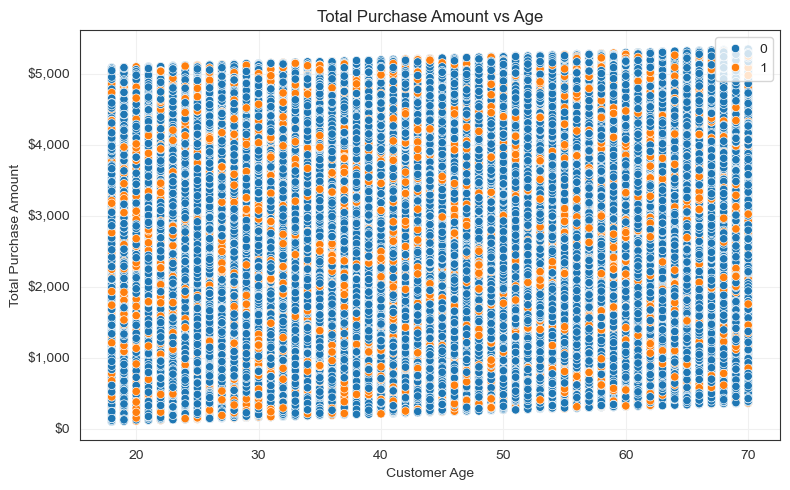

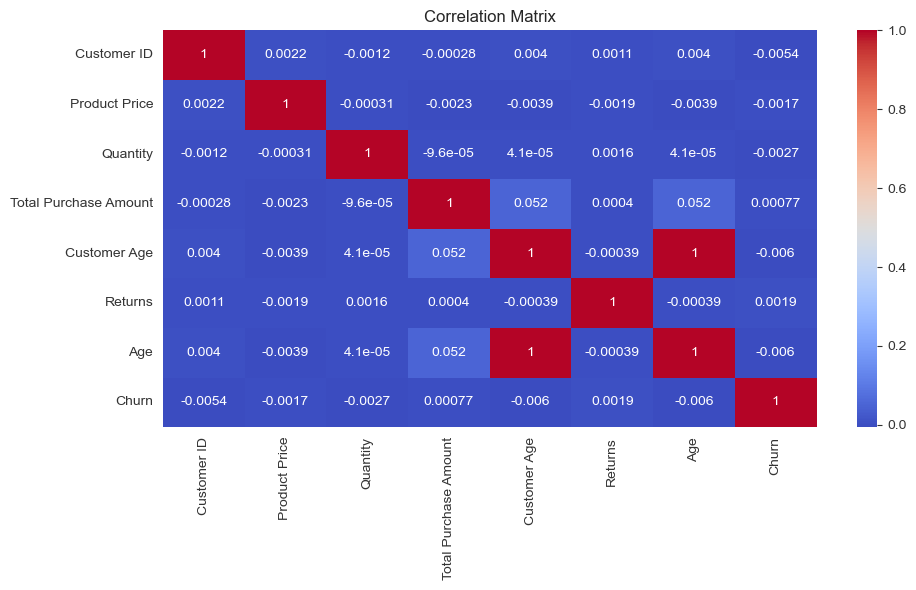

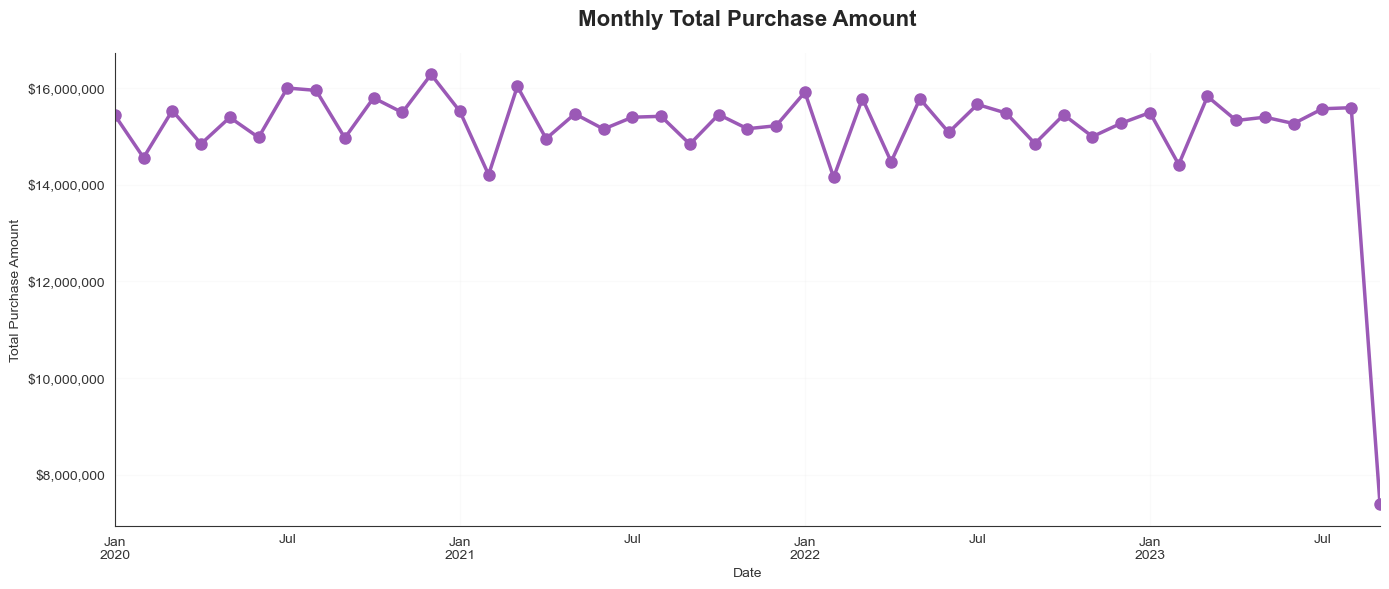

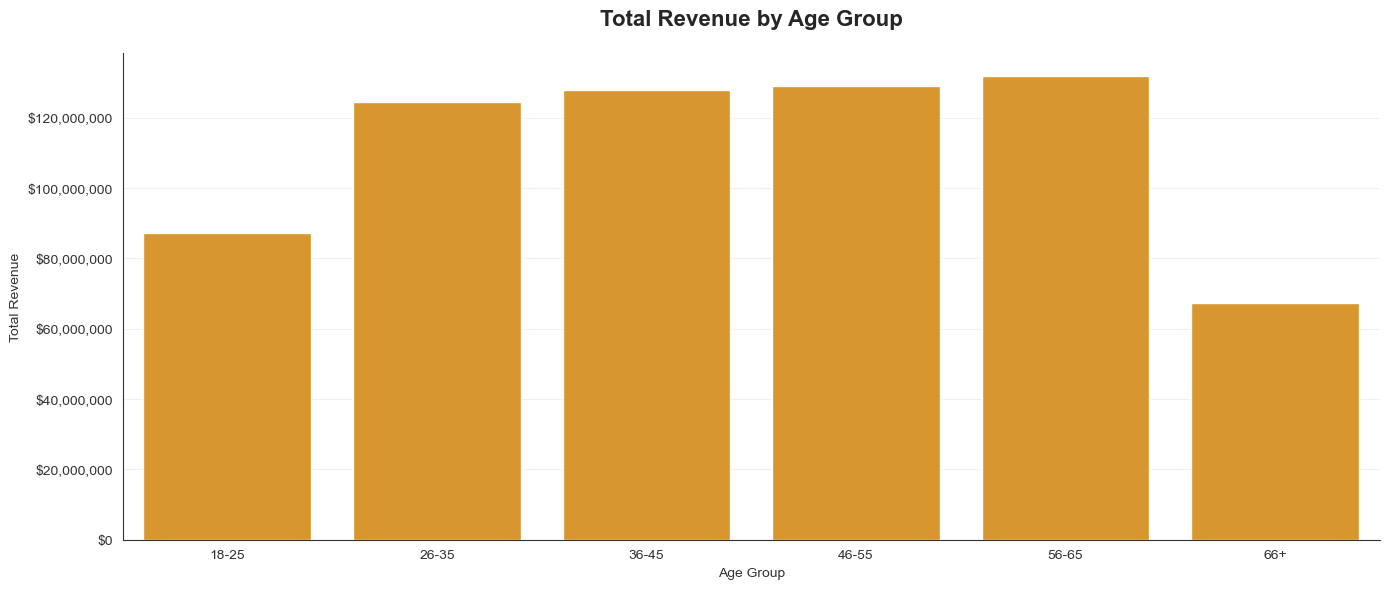


Customer behavior analysis completed successfully!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter
import os  

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '#f0f0f0',
    'axes.edgecolor': '#333333',
    'axes.labelcolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333'
})


def load_customer_data(filepath="ecommerce_customer_data_custom_ratios.csv"):
    try:
        df = pd.read_csv(filepath, encoding='ISO-8859-1')
        print("Initial Data Info:")
        print(df.info())

        print("\nChecking for duplicates...")
        df = df.drop_duplicates()
        print(f"Shape after removing duplicates: {df.shape}")

        print("\nChecking for missing values:")
        print(df.isnull().sum())

        df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
        df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'], errors='coerce')
        df['Customer Age'] = pd.to_numeric(df['Customer Age'], errors='coerce')
        df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
        df.dropna(subset=['Customer Age', 'Total Purchase Amount', 'Purchase Date'], inplace=True)

        return df
    except Exception as e:
        print(f"Error loading or processing data: {e}")
        return None


def currency_formatter(x, pos):
    return f"${x:,.0f}"


def analyze_customer_behavior(df):
    currency_format = FuncFormatter(currency_formatter)

    print("\nBasic Statistics:")
    print(df.describe())

    print("\nTop Product Categories:")
    print(df['Product Category'].value_counts())

    print("\nPayment Method Distribution:")
    print(df['Payment Method'].value_counts())

    print("\nChurn Rate:")
    print(df['Churn'].value_counts(normalize=True) * 100)

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Product Category',
                  order=df['Product Category'].value_counts().index,
                  color='#3498db')
    plt.title('Product Category Distribution', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Product Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    sns.despine()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Payment Method',
                  order=df['Payment Method'].value_counts().index,
                  color='#e74c3c')
    plt.title('Payment Method Usage', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Payment Method')
    plt.ylabel('Count')
    sns.despine()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Customer Age'], kde=True, bins=20,
                 color='#2ecc71', edgecolor='white', linewidth=0.5)
    plt.title('Customer Age Distribution', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Customer Age')
    plt.ylabel('Frequency')
    sns.despine()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=df, x='Gender', hue='Churn', palette=['#3498db', '#e74c3c'])
    plt.title('Churn by Gender', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 10,
                '{:.1f}%'.format(height / total * 100),
                ha="center", fontsize=10)
    plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    ax = sns.scatterplot(data=df, x='Customer Age', y='Total Purchase Amount', hue='Churn')
    plt.title('Total Purchase Amount vs Age')
    plt.xlabel('Customer Age')
    plt.ylabel('Total Purchase Amount')
    ax.yaxis.set_major_formatter(currency_format)
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 6))
    monthly_sales = df.set_index('Purchase Date')['Total Purchase Amount'].resample('ME').sum()
    ax = monthly_sales.plot(color='#9b59b6', linewidth=2.5, marker='o', markersize=8)
    plt.title('Monthly Total Purchase Amount', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Total Purchase Amount')
    ax.yaxis.set_major_formatter(currency_format)
    plt.grid(True, alpha=0.3)
    sns.despine()
    plt.tight_layout()
    plt.show()

    df['Age Group'] = pd.cut(df['Customer Age'],
                             bins=[18, 25, 35, 45, 55, 65, 100],
                             labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

    plt.figure(figsize=(14, 6))
    ax = sns.barplot(data=df, x='Age Group', y='Total Purchase Amount',
                     estimator=sum, ci=None, color='#f39c12')
    plt.title('Total Revenue by Age Group', fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Age Group')
    plt.ylabel('Total Revenue')
    ax.yaxis.set_major_formatter(currency_format)
    sns.despine()
    plt.tight_layout()
    plt.show()


def main():
    print("Task 1: Customer Behavior Analysis Program")
    print("====================================\n")
    filepath = "ecommerce_customer_data_custom_ratios.csv"

    if not os.path.exists(filepath):
        print(f"Error: File '{filepath}' not found.")
        return

    df = load_customer_data(filepath)
    if df is not None:
        analyze_customer_behavior(df)
        print("\nCustomer behavior analysis completed successfully!")
    else:
        print("Failed to complete analysis due to data issues.")


if __name__ == "__main__":
    main()
